# Lost in a Hyperspace: ML Regression challenge

<img src="https://drive.google.com/uc?id=12wfE98jwFoXy8H0rKbJvFjGj1QxxdDWd" width="750">



## Story Background
Congratulations on your promotion to Principal Engineering Detective! Your impressive work on the previous task has earned you this exciting new challenge.
Now, you are entrusted with the ancient and mesmerizing Glowing Hypercubes, which share some intriguing characteristics with the "Pulse of the Machine" widgets from your last mission (refer to Important Tips for details).
Your mission is to unravel the mysteries of these Glowing Hypercubes by predicting three vital properties using the provided data.
## Objective and Limitations
- Your ultimate goal is to effectively predicts three properties of the Glowing Hypercubes
- Every Glowing Hypercube is represented by the (5 x 5 x 5 x 6) array with lots of symmetries and unique properties (see Important tips section for details)
- You need to engineer a small number of features from the Glowing Hypercube data, since  efficient factory procedures allow you to **only use Linear Regression** as a model, with no hyperparameters change allowed. You are also limited by 300 features for each task.
- Your success will be measured by Root Mean Square Error metric for each feature independently and is translated into the score on the leaderboard.
- Note that different features have different weights in the final score. See `SCALING_WEIGHTS` variable for details. After scaling, to make a single score number, we will average normalized RMSEs for each property.
- Your solution for each task should not exceed 5 minutes for feature generation, training, and inference on the standard Colab non-GPU instance.
- Share the `ml_feature_0.txt`, `ml_feature_1.txt`, and `ml_feature_2.txt` files with us, and don't forget to supply your Google Colab as well

## Important Tips

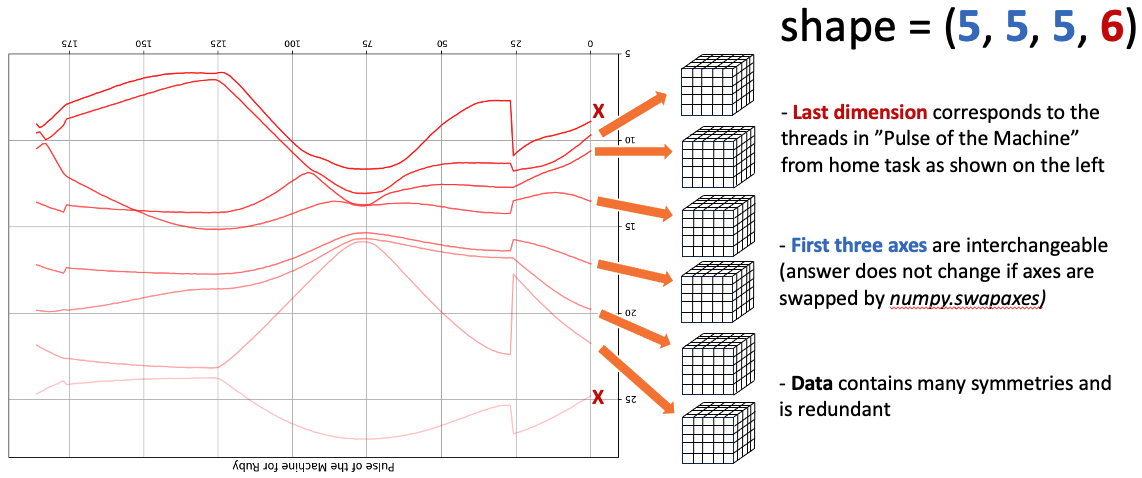

- Linear Regression documentation
  - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

- Handy Numpy functions:
  - https://numpy.org/doc/stable/reference/generated/numpy.swapaxes.html
  - https://numpy.org/doc/stable/reference/generated/numpy.ravel.html
  - https://numpy.org/doc/stable/reference/generated/numpy.reshape.html

- Root Mean Square Error
  - https://en.wikipedia.org/wiki/Root_mean_square_deviation

## Clarification of the methods' usage

Methods' usage limitations mostly resemble the ones for the home task, namely:

- Mind the time limits. These are separate for each forecasting model, and suggest non-GPU instance. This time includes feature generation, training, and inference on the validation/test set. Data analysis, feature search and selection are not subject to the time limitation

- Supervised neural networks (and any supervised models: LDA, boosting trees, etc) are not allowed as a feature extractor. Usage of simpler supervised models (e.g., ensembles on trees, linear regression) for the feature selection is allowed, given the model not being used as a feature extractor. Unsupervised learning is allowed (including autoencoders).

- Usage of pretrained models or auto ML solutions is not allowed. Libraries that automatically sort through various approaches (including unsupervised ones) for the users are not allowed as well.

- Given the time constraints, Colab notebooks should be as reproducible as possible. In case of doubt (abuse of the time limits, data usage, etc), Jury have the right to use the models/answers generated by the notebook, and pick the answers with the lower score.

- Yes, different models can use different feature sets.

- No, you cannot use the validation data for training.

**If you are not sure, please ask Jury!**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

SCALING_WEIGHTS = [100/15, 100/8, 100/100]

In [ ]:
!gdown 1IAZw8lzHB7BiENiJxBRYkvgXEPmeS0Gu
# Download the dataset by this link
# https://drive.google.com/file/d/1IAZw8lzHB7BiENiJxBRYkvgXEPmeS0Gu/view?usp=drive_link

Downloading...
From: https://drive.google.com/uc?id=1IAZw8lzHB7BiENiJxBRYkvgXEPmeS0Gu
To: /content/ml_data_onsite_start.pickle
100% 15.7M/15.7M [00:00<00:00, 18.7MB/s]


In [ ]:
data = pd.read_pickle('ml_data_onsite_start.pickle')
for key in data.keys():
  print(key)

X
y


In [ ]:
for key in data['X'].keys():
  print(key)

train
val
live_test


In [ ]:
for key in data['y'].keys():
  print(key)

train
val


In [ ]:
X_train = data['X']['train']
y_train = data['y']['train']

X_val = data['X']['val']
y_val = data['y']['val']

X_test = data['X']['live_test']

In [ ]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape

((2024, 5, 5, 5, 6), (2024, 3), (376, 5, 5, 5, 6), (376, 3), (200, 5, 5, 5, 6))

In [ ]:
def vis(arr):
  plt.figure(figsize=(8, 8))

  cnt = 1
  for z in range(5):
    for q in range(6):
      plt.subplot(5, 6, cnt)
      plt.imshow(arr[:, :, z, q], vmin=-40, vmax=40, cmap='hsv')
      plt.grid()
      plt.axis('off')
      cnt += 1
  plt.tight_layout()

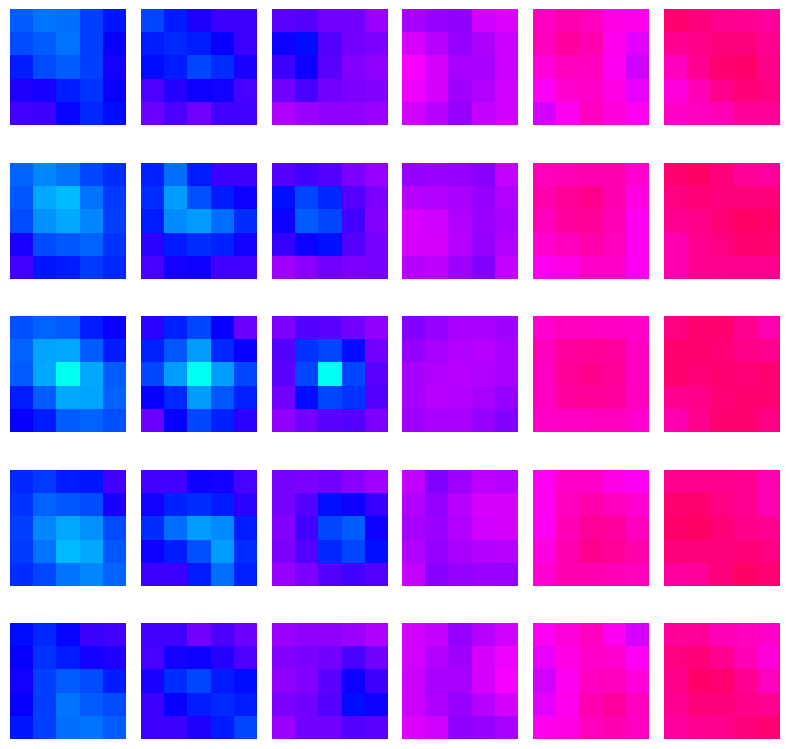

In [ ]:
vis(X_train[0])

# Functions for result evaluation / writing predictions

Do not change it!

In [ ]:
def test_solution(X_train, y_train, X_val, y_val, feature_num=0):
    assert X_train.shape[-1] <= 300, "Too many features! Should be less than 300"
    assert X_val.shape[-1] <= 300, "Too many features! Should be less than 300"

    model =  LinearRegression().fit(
        X_train,
        y_train[:, feature_num]
    )
    predictions = model.predict(X_val)
    rmse = mean_squared_error(
        predictions,
        y_val[:, feature_num]
    )**.5
    normalized_rmse = rmse * SCALING_WEIGHTS[feature_num]
    print(f"Property #{feature_num}:    raw RMSE={rmse:.6f}")
    print(f"Property #{feature_num}: scaled RMSE={normalized_rmse:.6f}")
    return normalized_rmse.round(6)

# Let's try a baseline solution

In [ ]:
def dummy_feature_extractor(X):
    X_new = X.reshape((X.shape[0], -1)) # ravel
    X_new = X_new[:, :300] # pick first 300 features
    return X_new

In [ ]:
 dummy_feature_extractor(X_train).shape

(2024, 300)

In [ ]:
%%time
total_score = 0
for feature_number in range(3):
  total_score += test_solution(
      dummy_feature_extractor(X_train),
      y_train,
      dummy_feature_extractor(X_val),
      y_val,
      feature_num=feature_number
  )
  print()
total_score /= 3
print('='*16)
print(f"Total score = {total_score:.6f}")

Property #0:    raw RMSE=0.463354
Property #0: scaled RMSE=3.089026

Property #1:    raw RMSE=1.166899
Property #1: scaled RMSE=14.586239

Property #2:    raw RMSE=2.735714
Property #2: scaled RMSE=2.735714

Total score = 6.803660
CPU times: user 2.2 s, sys: 109 ms, total: 2.3 s
Wall time: 5.9 s


# How to prepare the answer files

In [ ]:
def generate_predictions(X_train, y_train, X_test, feature_num=0):
    assert X_train.shape[-1] <= 300
    assert X_test.shape[-1] <= 300

    model =  LinearRegression().fit(
        X_train,
        y_train[:, feature_num]
    )
    predictions = model.predict(X_test)
    return predictions


## Generate solutions and write to the file
combined = {'ID': np.arange(X_test.shape[0])}

for feature_number in range(3):
    predictions = generate_predictions(
        dummy_feature_extractor(X_train),
        y_train,
        dummy_feature_extractor(X_test),
        feature_num=feature_number
    )

    combined[f'y{feature_number+1}'] = predictions

pd.DataFrame(combined).to_csv('predictions.csv', index=False)

In [ ]:
# load the test dataset
!gdown 1K_KNlfIuusgQjeN3gWJ2htutbO2iX7YE
loaded = pd.read_pickle("ml_data_onsite_final_test.pickle")
X_test_final = loaded['X']['final_test']


# make final predictions
combined = {'ID': np.arange(X_test_final.shape[0])}

for feature_number in range(3):
    predictions = generate_predictions(
        dummy_feature_extractor(X_train),
        y_train,
        dummy_feature_extractor(X_test_final),
        feature_num=feature_number
    )

    combined[f'y{feature_number+1}'] = predictions

pd.DataFrame(combined).to_csv('final_predictions.csv', index=False)

# Author solution

- Replicate the data 5 more times, swapping axes (number of permutations for three axes)

- (Optionally) Delete duplicate columns

- Use PCA, it helps

- (Author's knowledge) One of the features is from the previous task, gives biggest improvement, so home-task knowledge definitely helps

Most successful teams combined some replication(=augmentation), features from home task, and PCA. Validation set should be a good indicator whether particular feature is a good idea to add.

In [ ]:
def symmetrize_x(X_tr, y_tr):
    xxx = [
        X_tr,
        X_tr.swapaxes(1, 2),
        X_tr.swapaxes(1, 3),
        X_tr.swapaxes(2, 3),
        X_tr.swapaxes(1, 3).swapaxes(1, 2),
        X_tr.swapaxes(1, 3).swapaxes(2, 3),
    ]
    return np.concatenate(xxx), np.vstack([y_tr]*6)

In [ ]:
def ravelize(X):
    return X.reshape((X.shape[0], -1))

In [ ]:
def make_bg(X):
    bgs = []
    for _x in X:
        bg = _x[:,:,:,3].ravel().min() - _x[:,:,:,2].ravel().max()
        bgs.append(bg)
    bgs = np.array(bgs)
    return bgs[:, None]

In [ ]:
X_train_symm, y_train_symm = symmetrize_x(X_train, y_train)

In [ ]:
X_train_bg = make_bg(X_train_symm)
X_val_bg = make_bg(X_val)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=299)
X_train_pca = pca.fit_transform(ravelize(X_train_symm))
X_val_pca = pca.transform(ravelize(X_val))

In [ ]:
%%time
total_score = 0
for feature_number in range(3):
  total_score += test_solution(
      X_train_pca,
      y_train_symm,
      X_val_pca,
      y_val,
      feature_num=feature_number
  )
  print()
total_score /= 3
print('='*16)
print(f"Total score = {total_score:.6f}")

Property #0:    raw RMSE=0.311959
Property #0: scaled RMSE=2.079725

Property #1:    raw RMSE=0.597576
Property #1: scaled RMSE=7.469701

Property #2:    raw RMSE=1.641121
Property #2: scaled RMSE=1.641121

Total score = 3.730182
CPU times: user 6.31 s, sys: 169 ms, total: 6.48 s
Wall time: 12.1 s


In [ ]:
%%time
total_score = 0
# something close to the best possible solution
for feature_number in range(3):
  total_score += test_solution(
      np.concatenate([X_train_pca, X_train_bg], axis=-1),
      y_train_symm,
      np.concatenate([X_val_pca, X_val_bg], axis=-1),
      y_val,
      feature_num=feature_number
  )
  print()
total_score /= 3
print('='*16)
print(f"Total score = {total_score:.6f}")

Property #0:    raw RMSE=0.306098
Property #0: scaled RMSE=2.040654

Property #1:    raw RMSE=0.102632
Property #1: scaled RMSE=1.282899

Property #2:    raw RMSE=1.631760
Property #2: scaled RMSE=1.631760

Total score = 1.651771
CPU times: user 4.19 s, sys: 169 ms, total: 4.36 s
Wall time: 5.24 s
